#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#load dataset

In [108]:
df = pd.read_excel('/content/drive/MyDrive/dataset1/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [109]:
df.shape

(541909, 8)

In [110]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# 1a. Missing Data Treatment:

In [111]:
# Check for missing data
missing_data = df.isnull().sum()
# percentage of missing data
percentage_missing = (missing_data / len(df)) * 100
# Create a dataframe for analysis
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': percentage_missing
}).sort_values(by='Percentage', ascending=False)


missing_info.head()

,Missing Values,Percentage
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000


# 1b. Removing Duplicate Data:

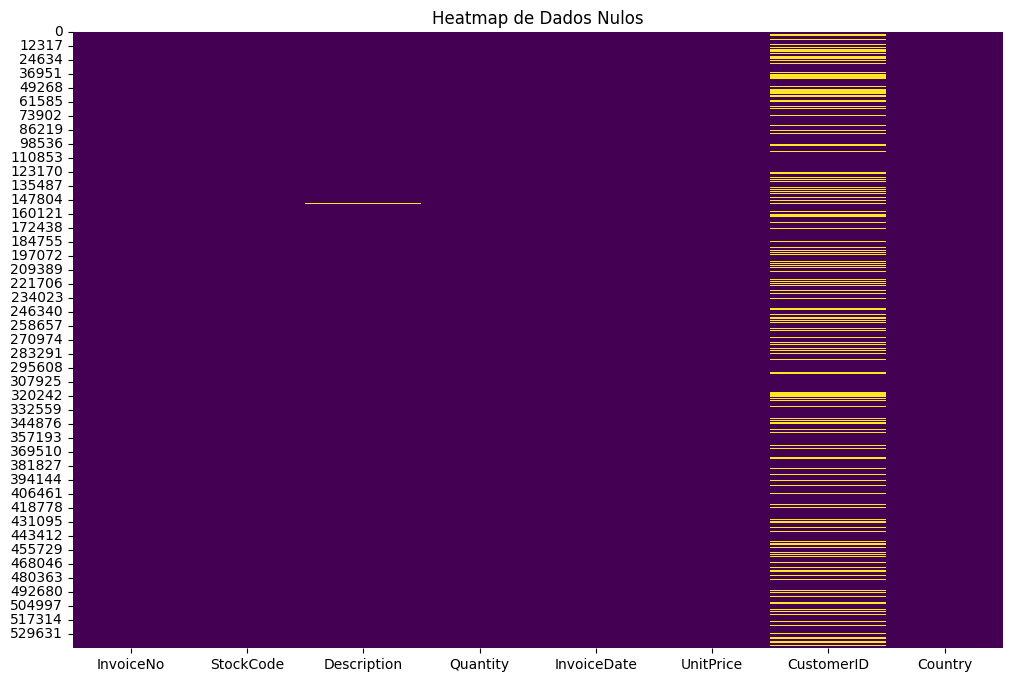

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize null data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Heatmap de Dados Nulos')
plt.show()

In [113]:
# Check and remove duplicate data
duplicated_data = df[df.duplicated()]
# Check and remove duplicate data
df = df.drop_duplicates()

# Check again for duplicates after removal
duplicated_data_after_removal = df[df.duplicated()]

# Display the number of duplicates removed
len(duplicated_data)

5268

I decided to fill in null 'CustomerID' values with N/A because I wanted to keep them in the dataset but differentiate them from those that have 'CustomerID' valid.and I did two types, removing and not removing the null data, there was no difference.

I decided to fill in the null data in the 'Description' column with 'NO SOURCE' because there was little and it didn't make much difference in the data analysis

In [63]:
df.dropna(subset=['CustomerID'], inplace=True)
df['Description'].fillna('NO SOURCE', inplace=True)

<ipython-input-63-6a722fe0a55b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID'], inplace=True)
<ipython-input-63-6a722fe0a55b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna('NO SOURCE', inplace=True)


In [115]:
df['CustomerID'].fillna('N/A', inplace=True)
df['Description'].fillna('NO SOURCE', inplace=True)

<ipython-input-115-031dcc711fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'].fillna('N/A', inplace=True)
<ipython-input-115-031dcc711fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna('NO SOURCE', inplace=True)


#  1c. Descriptive Analysis:

In [116]:
# Perform descriptive analysis
descriptive_stats = df.describe(include='all')

# Display descriptive statistics
descriptive_stats

<ipython-input-116-fd79a488bf52>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641.0,536641,536641,536641.000000,536641,536641.000000,536641,536641
unique,25900.0,4070,4224,NaN,23260,NaN,4373,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,N/A,United Kingdom
freq,1114.0,2301,2357,NaN,1114,NaN,135037,490300
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,NaN,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN


#'################################################'

# STEP 1 . finished

#'################################################'

2.	Cohort Analysis: A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts.

# 2a. a.	Create month cohorts and analyse active  customers for each cohort.

In [117]:
# Create a Cohort Column:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

<ipython-input-117-ef4dfe4ea6b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
<ipython-input-117-ef4dfe4ea6b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


In [118]:
# Calculate the Period since Acquisition:
df['CohortIndex'] = ((df['InvoiceDate'] - df['CohortMonth'].dt.to_timestamp()).dt.days // 30)

<ipython-input-118-02d8bc8a2e24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = ((df['InvoiceDate'] - df['CohortMonth'].dt.to_timestamp()).dt.days // 30)


In [119]:
# Create a retention table
retention_table = df.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID', aggfunc=pd.Series.nunique)

In [120]:
# Calculate retention rate
cohort_size = retention_table.iloc[:, 0]
retention_matrix = retention_table.divide(cohort_size, axis=0)

In [121]:
# Retention table
print(retention_matrix)

CohortIndex   0         1         2         3         4         5         6   \
CohortMonth                                                                    
2010-12      1.0  0.360379  0.358272  0.375132  0.373024  0.387777  0.368809   
2011-01      1.0  0.302730  0.290323  0.253102  0.337469  0.302730  0.275434   
2011-02      1.0  0.250000  0.189474  0.271053  0.268421  0.242105  0.250000   
2011-03      1.0  0.236967  0.255924  0.220379  0.234597  0.184834  0.251185   
2011-04      1.0  0.224080  0.224080  0.217391  0.200669  0.210702  0.234114   
2011-05      1.0  0.270370  0.185185  0.170370  0.188889  0.288889  0.255556   
2011-06      1.0  0.195745  0.187234  0.251064  0.246809  0.327660  0.148936   
2011-07      1.0  0.229947  0.203209  0.245989  0.262032  0.155080       NaN   
2011-08      1.0  0.296296  0.228395  0.277778  0.154321       NaN       NaN   
2011-09      1.0  0.291946  0.312081  0.140940       NaN       NaN       NaN   
2011-10      1.0  0.282799  0.154519    

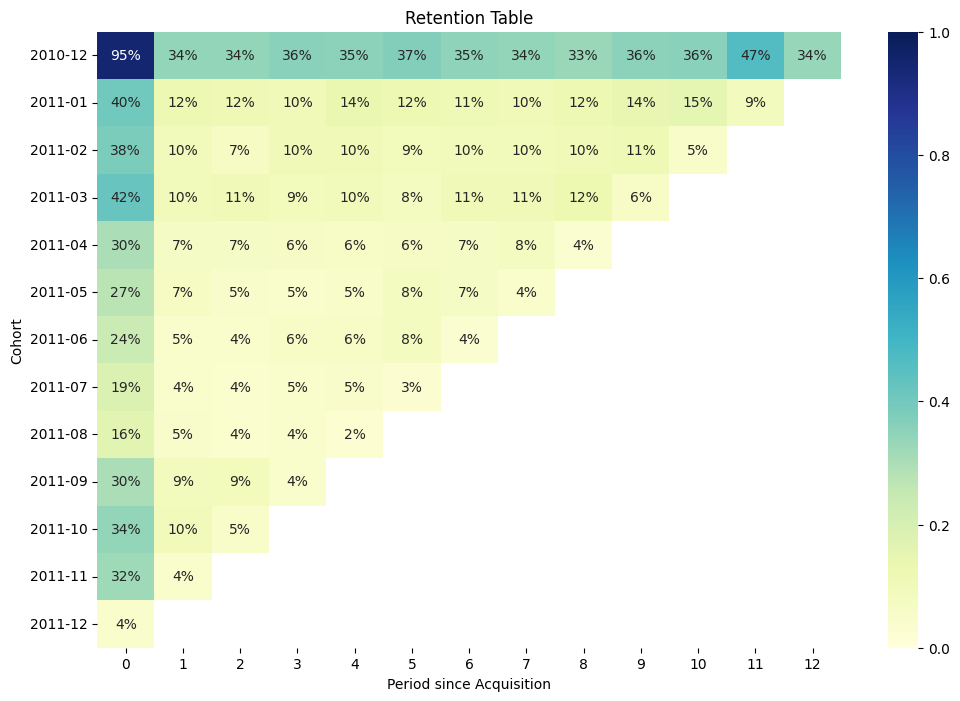

In [122]:
#  Heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(retention_table / 1000, annot=True, fmt=".0%", cmap="YlGnBu", vmin=0.0, vmax=1.0)
plt.title('Retention Table')
plt.xlabel('Period since Acquisition')
plt.ylabel('Cohort')
plt.show()

# 2b.	Also Analyse the retention rate of customers. Comment.

In [123]:
# Calculate the average retention rate per period:
retention_rate = retention_table.mean(axis=0)


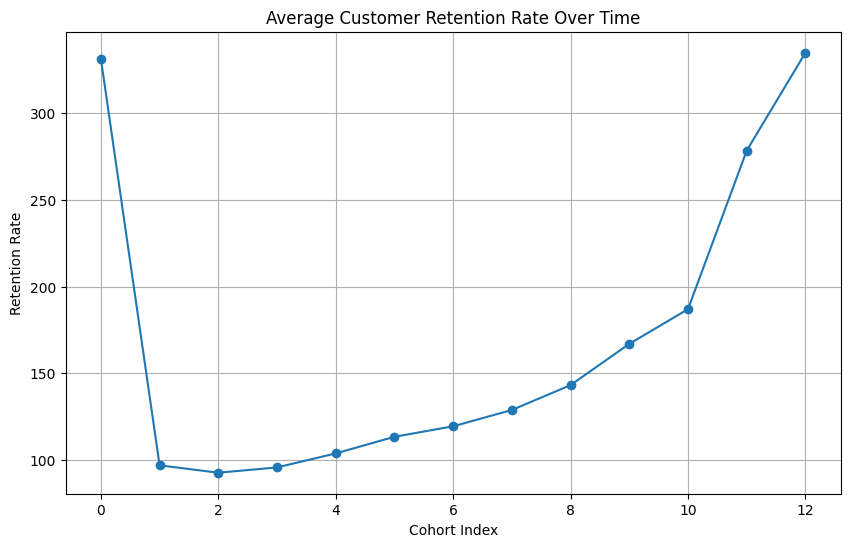

In [124]:
# View retention rate over time:
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.index, retention_rate.values, marker='o')
plt.title('Average Customer Retention Rate Over Time')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()



#* Strong startand then a strong decay: Since at the beginning all customers are retained, it starts high, but soon drops, which could mean a few things like:
        Unmet expectations: Customers may have initial expectations that are not met after the first interaction with the product or service.

        Quality problems: If there are quality problems with the products or services, customers may be disappointed and choose not to continue.

        Inadequate communication: If communication about the product or service is unclear, customers may become confused or dissatisfied.

        Competition: If customers find more attractive offers from competitors, they may choose to switch quickly.

#* Recovery: As retention strategies, special offers, or other initiatives are implemented, the retention rate may begin to recover

#* Stability: Over time, the retention rate may stabilize at a more sustainable level.





#'################################################'

# STEP 2 . finished

#'################################################'

3.	Build a RFM model – Recency Frequency and Monetary based on their behaviour.
Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time

In [125]:
# 1. Recency
max_date = df['InvoiceDate'].max()
df['Recency'] = (max_date - df['InvoiceDate']).dt.days

# 2. Frequency
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
df = pd.merge(df, frequency_df, on='CustomerID', how='left')

# 3. Monetary
monetary_df = df.groupby('CustomerID')['UnitPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
df = pd.merge(df, monetary_df, on='CustomerID', how='left')

<ipython-input-125-157c12a62467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recency'] = (max_date - df['InvoiceDate']).dt.days


In [126]:
# 4. Segmentation (using k-means, for example)
from sklearn.cluster import KMeans
features = df[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['RFM_Segment'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [127]:
# Results

print(df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment']])

       CustomerID  Recency  Frequency  Monetary  RFM_Segment
0         17850.0      373         35   1209.66            1
1         17850.0      373         35   1209.66            1
2         17850.0      373         35   1209.66            1
3         17850.0      373         35   1209.66            1
4         17850.0      373         35   1209.66            1
...           ...      ...        ...       ...          ...
536636    12680.0        0          4    189.17            1
536637    12680.0        0          4    189.17            1
536638    12680.0        0          4    189.17            1
536639    12680.0        0          4    189.17            1
536640    12680.0        0          4    189.17            1

[536641 rows x 5 columns]


In [128]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Recency,Frequency,Monetary,RFM_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,0,373,35,1209.66,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0,373,35,1209.66,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,0,373,35,1209.66,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0,373,35,1209.66,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0,373,35,1209.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08,4,0,4,189.17,1
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08,4,0,4,189.17,1
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08,4,0,4,189.17,1
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08,4,0,4,189.17,1


# dataset to see frequency for each user

In [129]:
# Calculate the Frequency for each customer:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']


In [130]:
frequency_df

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16
4371,18287.0,3


#'################################################'

# End of the project thank you very much

#'################################################'

In [81]:
from google.colab import files
files.download('meu_dataset_limpo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>